In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [10]:
data = pd.read_csv('/content/Housing.csv')

In [11]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [13]:
data.shape

(545, 13)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [16]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [19]:
dataset = data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

In [21]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [22]:
correlation = dataset.corr()

<Axes: >

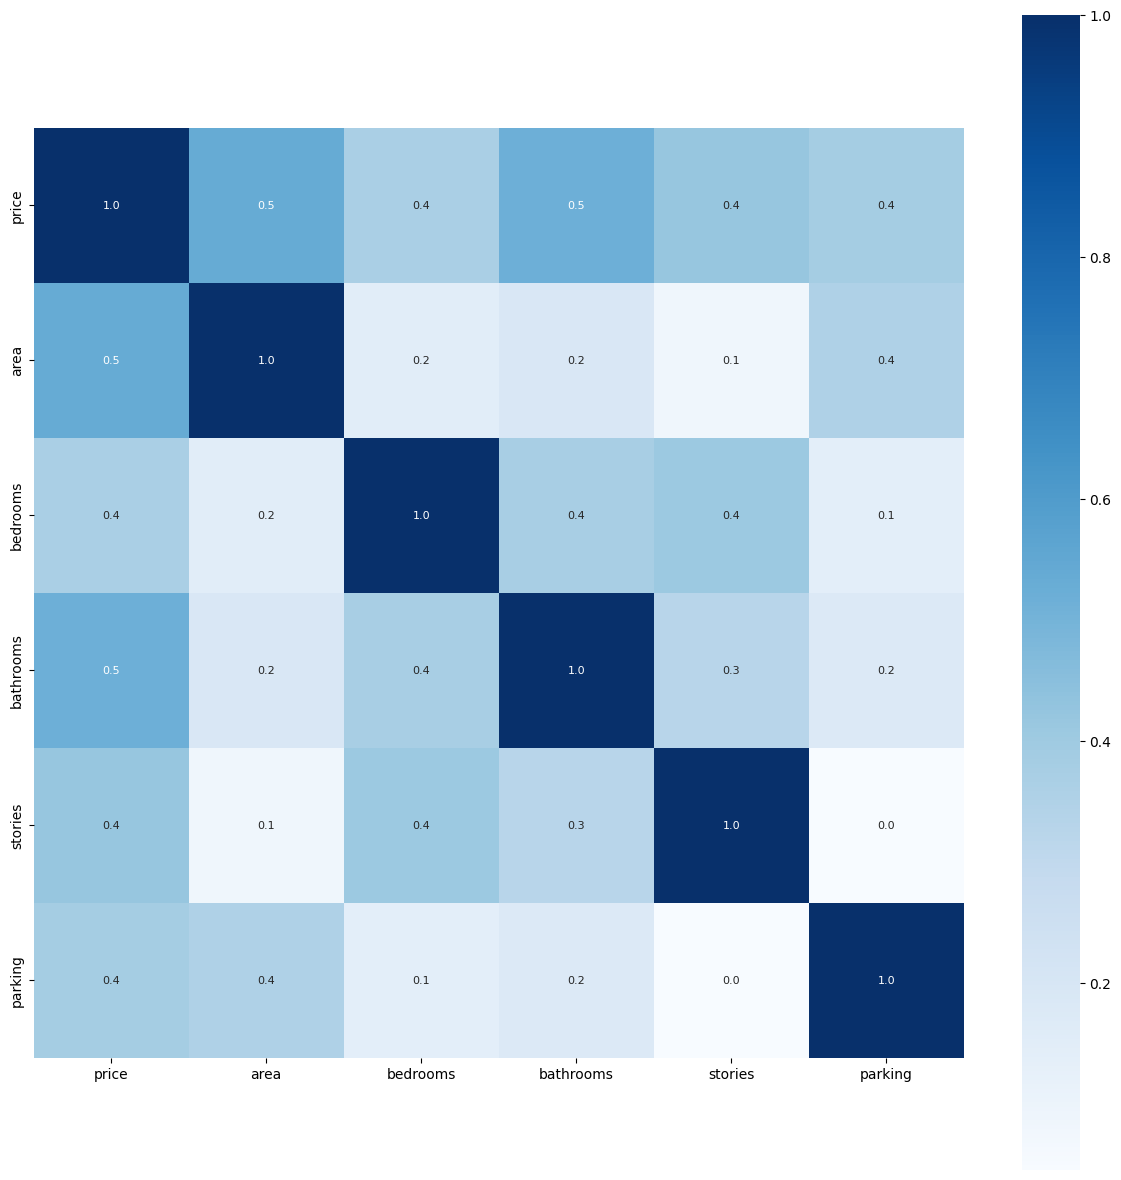

In [25]:
#constructing heatmap


plt.figure(figsize=(15, 15))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size": 8}, cmap="Blues")

In [28]:
x = dataset.drop(['price'], axis = 1)
y = dataset['price']

In [29]:
x

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2
...,...,...,...,...,...
540,3000,2,1,1,2
541,2400,3,1,1,0
542,3620,2,1,1,0
543,2910,3,1,1,0


In [30]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [31]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.2, random_state = 2)

In [32]:
print(x_train.shape, x_test.shape, x.shape)

(436, 5) (109, 5) (545, 5)


Model Training - XGBoost Regressor

In [33]:
#loading the model

model = XGBRegressor()

In [34]:
#training the model

model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluating the model

In [35]:
#predicting on training data

data_predict = model.predict(x_train)
data_predict

array([ 3420302.2,  4237653. ,  2515418.2,  4950223. ,  4099487.2,
        7345578. ,  3087323.2,  2766970.5,  6928292.5,  4597473. ,
        3430693.8,  3411721.5,  6122547. ,  5760622. ,  7658497. ,
        3961564.8,  5080206.5,  4542765. ,  7619728.5,  4044779.2,
        4040915.5,  3218254.8,  5299501. ,  4416962.5,  3929403. ,
        4279347.5,  6774748. ,  9181800. ,  4621186. ,  3353261.8,
        4061792.5,  3177262.2,  2595471.2,  3917471.2,  4395547. ,
        3085494.5,  4860064. ,  3841533.8,  2011461.1,  7991436. ,
        4053961.8, 12132570. ,  8518272. ,  7293174.5,  4140822.8,
        3126925.2,  4089616.2,  3475126. ,  3382802.5,  2470844.2,
        5548034.5,  4060728.5,  3911440. ,  3422239.8,  4230979. ,
        5389872.5,  3652815.2,  3794333.8,  3750801. ,  4138126.5,
        7345578. ,  4241929.5,  6042503.5,  3792662.8,  3738665.5,
        5333687. ,  6409431. ,  6012464. ,  5455705.5,  5385725. ,
        3286394.5,  3693268.2,  2992060.8,  4921562.5,  537663

In [36]:
# R squared error

score_1 = metrics.r2_score(y_train, data_predict)
score_1

0.9789071318644258

In [37]:
# Mean Absolute Error

score_2 = metrics.mean_absolute_error(y_train, data_predict)
score_2

169212.7396788991

predicting on test data

In [38]:
test_data_predict = model.predict(x_test)
test_data_predict

array([ 3972279.5,  4748694.5,  2759924. ,  3367579.8,  5735574.5,
        4676600. ,  4730956.5,  3609959.5,  2626001.2,  7572224.5,
        4076122.5,  3108940.2,  4334380.5,  4641804. ,  6334564.5,
        6681154. ,  5768406.5,  3681597.2,  3268377.8,  4878692.5,
        3745624. ,  3139513.8,  5183788. ,  8239670.5,  2402668.5,
        2561498. ,  3746642.2,  3910520.2,  4132497. ,  3129611.8,
        3364788. ,  2671302.8,  3030635.8,  5809397. ,  3825520.8,
        7866647.5,  3288325.5, 10264586. ,  7676281. ,  4301000.5,
        6634975.5,  3515169. ,  3008370.5,  6285333. ,  3950236.5,
        4750910.5,  2626001.2,  2426133.5,  3679470.8,  4494231. ,
        8454161. ,  5941032.5,  2400021.2,  3746642.2,  4775148.5,
        2609276.8,  4038600.5,  3151746.2,  2668607.8, 11340472. ,
        3565427.5,  3218254.8,  3614418.8,  4986388.5, 12011353. ,
        4513605.5,  3917471.2,  3679239.8,  4873912. ,  4864543. ,
        7049984. ,  4178917.8,  6162825. ,  4725652. ,  405396

In [39]:
# R squared error

score_1 = metrics.r2_score(y_test, test_data_predict)
score_1

0.04430197392138813

In [40]:
# Mean Absolute Error

score_2 = metrics.mean_absolute_error(y_test, test_data_predict)
score_2

1294156.4678899082

visualising the actual price and predicted price

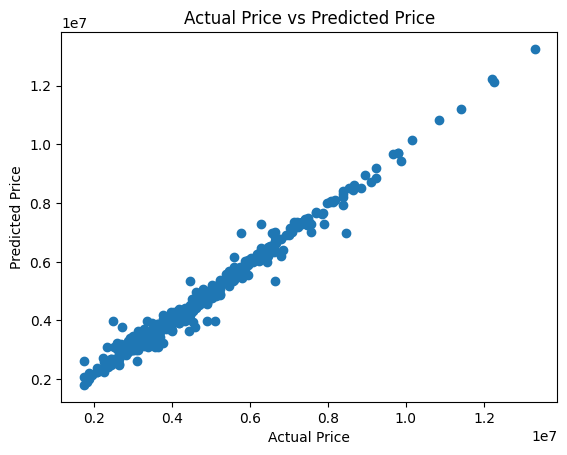

In [41]:
plt.scatter(y_train, data_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()